In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import os
import sys

import warnings
import argparse
import numpy as np
import yaml
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
img_dir = "/data/colposcopy/colposcopy"

type_1_train = glob(os.path.join(img_dir,"train*","Type_1","*.jpg"))
type_2_train = glob(os.path.join(img_dir,"train*","Type_2","*.jpg"))
type_3_train = glob(os.path.join(img_dir,"train*","Type_3","*.jpg"))

img_test   = glob(os.path.join(img_dir,"test","*.jpg"))
img_test_wo_answer = glob(os.path.join(img_dir,"test_stg2","*.jpg"))
f = open(os.path.join(img_dir,"solution_stg1_release.csv"))
type_dict = {}

cont = f.readlines()
for i in range(1, len(cont)):
    line = cont[i].rstrip('\n')
    ctype = line.split(',').index('1')
#    print(i,ctype)
    type_dict[i] = ctype
f.close()

print("training num:",len(type_1_train),len(type_2_train),len(type_3_train))
print("test num (with answer):",len(img_test))

training num: 1441 4348 2426
test num (with answer): 512


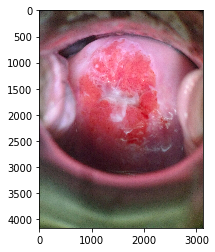

In [3]:
def cvt(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = cv2.imread(type_1_train[0])
plt.imshow(cvt(img))

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import numpy as np 
 
from sklearn import datasets 
from sklearn.cross_validation import StratifiedKFold 
from sklearn.externals.six.moves import xrange 
from sklearn.mixture import GMM 
 
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2,:2])
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi 
    v *= 9
    ell = mpl.patches.Ellipse(gmm.means_[n,:2], v[0], v[1], 180 + angle, color = color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    
iris = datasets.load_iris()
skf = StratifiedKFold(iris.target, n_folds = 4)
train_index, test_index = next(iter(skf))
 
X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]
 
n_classes = len(np.unique(y_train))
classifiers = dict((covar_type, GMM(n_components = n_classes, covariance_type = covar_type, init_params = 'wc', n_iter = 20)) \
                   for covar_type in ['spherical', 'diag', 'tied', 'full'])
n_classifiers = len(classifiers)
 
plt.figure(figsize = (3 * n_classifiers / 2, 6))
plt.subplots_adjust(bottom = .01, top = 0.95, hspace = .15, wspace = .05, left = .01, right = .99)
 
for index, (name, classifier) in enumerate(classifiers.items()):
 classifier.means_ = np.array([X_train[y_train == i].mean(axis = 0) for i in xrange(n_classes)])
 classifier.fit(X_train)
 h = plt.subplot(2, n_classifiers / 2, index + 1)
 make_ellipses(classifier, h)
 
 for n, color in enumerate('rgb'):
  data = iris.data[iris.target == n]
  plt.scatter(data[:,0], data[:,1], 0.8, color = color, label = iris.target_names[n])
 
 for n, color in enumerate('rgb'):
  data = X_test[y_test == n]
  plt.plot(data[:,0], data[:,1], 'x', color = color)
 
 y_train_pred = classifier.predict(X_train)
 train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
 plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy, transform = h.transAxes)
 
 y_test_pred = classifier.predict(X_test)
 test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
 plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform = h.transAxes)
 
 plt.xticks(())
 plt.yticks(())
 plt.title(name)
 
plt.legend(loc = 'lower right', prop = dict(size = 12))
plt.show()
